In [ ]:
#@title Librerias
from IPython.display import display, Latex
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
import random
import math
import time

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: Edwar Isaías Pacheco Rojas
### Documento: 1017240283
*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:

\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto está la solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

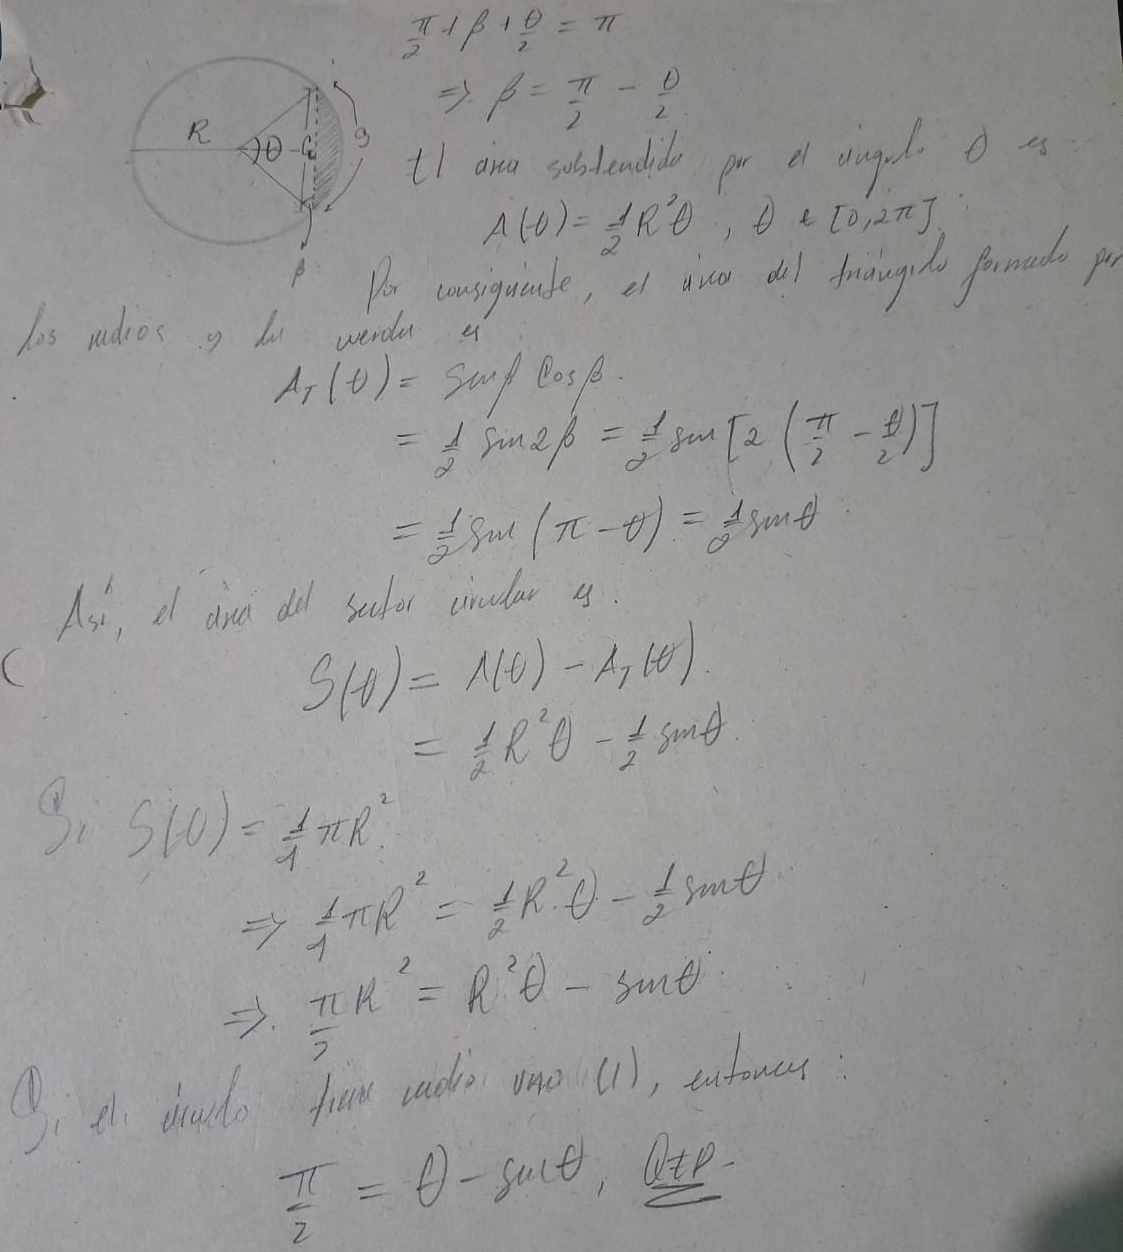

In [ ]:
# Aquí va su código

"""
La función f del área del sector circular se toma para un círculo de radio R
igual a uno (1). En consecuencia, responder la pregunta consiste encontrar el
valor del ángulo en el cual la función es igual a pi / 2.
"""

theta = np.linspace(0, 2 * np.pi, 10000)  # Se cubre todo el círculo
k = np.pi / 4  # Constante (área de un cuarto de círculo de radio uno (1))
f = lambda tetha: 0.5 * tetha - 0.5 * np.sin(tetha)  # Área del sector en
                                                     # términos del ángulo

df_theta = pd.DataFrame({'Ángulo, θ':theta})
df_f = pd.DataFrame({'f(θ)':f(theta)})

datos = pd.concat([df_theta, df_f], axis=1)
datos.loc[3674:3679, :]

,"Ángulo, θ",f(θ)
3674,2.308673,0.784387
3675,2.309302,0.784913
3676,2.309930,0.785439
3677,2.310558,0.785965
3678,2.311187,0.786491
3679,2.311815,0.787017


In [ ]:
# Solución intuitiva

diferencia = np.abs(f(theta) - k)

tolerancia = 0.0001
index = np.where(diferencia < tolerancia)

# Solución
theta_value = theta[index]

# Punto solución para f(θ) = pi / 4
print(f'Valor de θ buscado: {theta_value}')
print()
print(f'Valor de la función f({theta_value}={f(theta_value)})')

Valor de θ buscado: [2.30992991]

Valor de la función f([2.30992991]=[0.78543871])


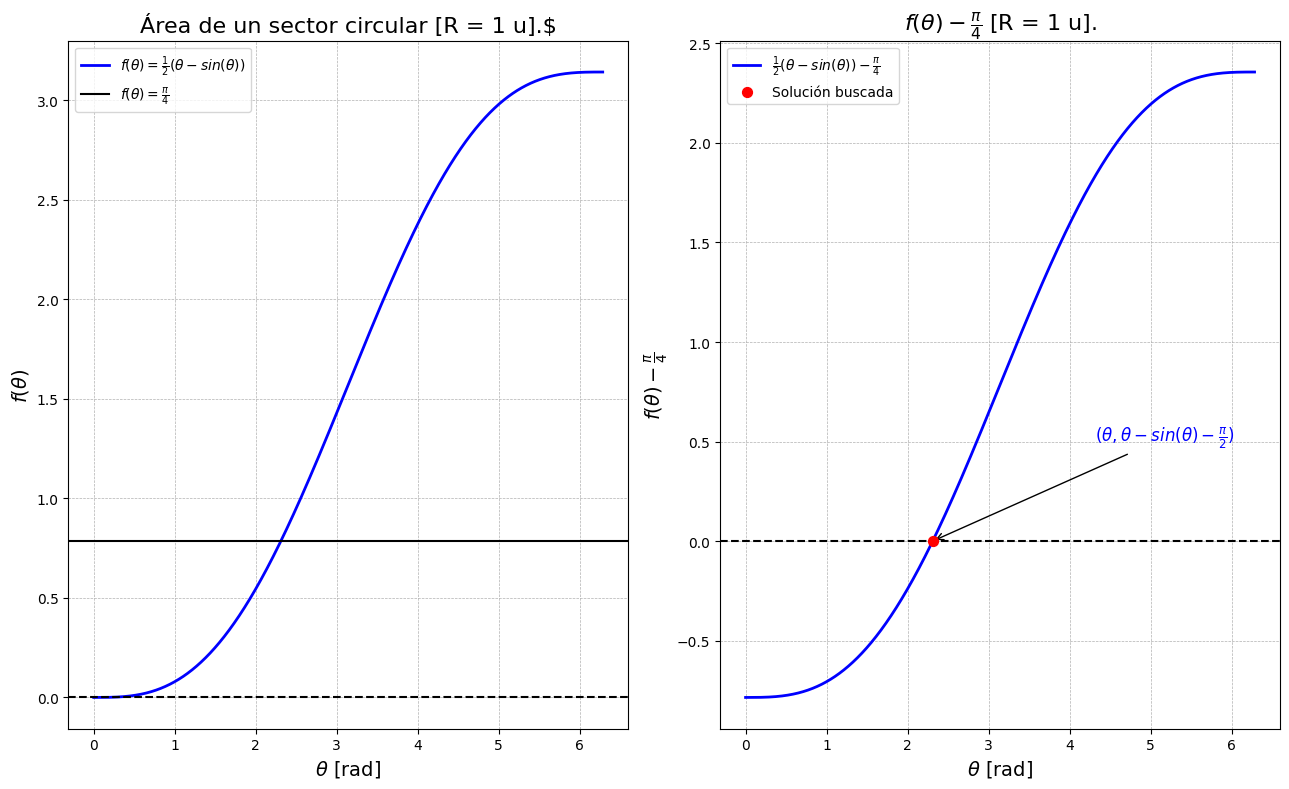

In [ ]:
# Gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 8))

# Función del área del sector circular
ax1.plot(theta, f(theta),
         label=r'$f(\theta) = \frac{1}{2}(\theta - sin(\theta))$', color='blue',
         linewidth=2)
ax1.set_title('Área de un sector circular [R = 1 u].$', fontsize=16)
ax1.set_xlabel(r'$\theta$ [rad]', fontsize=14)
ax1.axhline(0, color='black', linestyle='--')
ax1.set_ylabel(r'$f(\theta)$', fontsize=14)
ax1.axhline(y=np.pi / 4, color='black', linestyle='solid',
            label=r'$f(\theta) = \frac{\pi}{4}$')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.legend()


# Diferencia de funciones para hallar el ángulo de solución
ax2.plot(theta, f(theta) - k,
         label=r'$\frac{1}{2}(\theta - sin(\theta)) - \frac{\pi}{4}$',
         color='blue', linewidth=2)
ax2.set_title(r'$f(\theta) - \frac{\pi}{4}$ [R = 1 u].', fontsize=16)
ax2.set_xlabel(r'$\theta$ [rad]', fontsize=14)
ax2.axhline(0, color='black', linestyle='--')
ax2.set_ylabel(r'$f(\theta) - \frac{\pi}{4}$', fontsize=14)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Punto buscado
theta_value
f_theta_value = 0
ax2.scatter(theta_value, f_theta_value, color='red', s=50, zorder=5, label=\
            'Solución buscada')

# Anotaciones sobre el punto
ax2.annotate(r'$(\theta, \theta - sin(\theta) - \frac{\pi}{2})$',
             xy=(theta_value, 0), xytext=(theta_value + 2, 0 + 0.5),
             fontsize=12, color='b', arrowprops=dict(facecolor='black',
                                                     arrowstyle='->')
            )
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Método de bisección
def biseccion(f, a:float, b:float, tol=1e-10, max_iter=100) -> tuple:

  """
  Implementación del método de bisección para determinar raíces de funciones
  continuas en un intervalo [a, b].

  Args:
    f: función continua analizada
    a: Límite inferior del intervalo
    b: Límite superior del intervalo
    tol: error en la solución
    max_iter: número máximo de iteraciones para determinar la solución.

  returns:
    Aproximación de la raíz
    Iteraciones realizadas
    Array con errores en cada cálculo de la solución.
  """

  iter = 0  # Contador para el ciclo while
  iteraciones = np.arange(max_iter)  # Cantidad de iteraciones realiazadas
  errores_abs = np.zeros(max_iter)  # Errores absolutos
  c_inicial = b  # Puede ser cualquier valor en el que f esté definida. General-
                 # mente en el intervalo

  while iter < max_iter:
    c = (a + b) / 2
    errores_abs[iter] = abs(c_inicial - c)

    # Verificación inicial para el método
    if f(a) * f(b) >= 0:
      raise ValueError('Sin raíz en el intervalo o hay múltiples raíces.')

    # Iniciación del método de bisección
    if abs(f(c)) < tol:
      return c, errores_abs[:iter], iteraciones[:iter]

    if f(a) * f(c) < 0:
      b = c
    else:
      a = c

    iter += 1

  raise RuntimeError(f'No se halló la raíz después de {max_iter} iteraciones.')



In [ ]:
# Solución por el método de bisección
f_dif = lambda theta: 0.5 * (theta - np.sin(theta)) - np.pi / 4
theta_approx, errores, iteraciones = biseccion(f_dif, 0, 2 * np.pi)
print(f'Solución por el método de bisección: {theta_approx:.2f} radianes.')
print(f'Se requirieron {len(iteraciones)} iteraciones.')

Solución por el método de bisección: 2.31 radianes.
Se requirieron 33 iteraciones.


# Método de punto fijo.
1. Reformulación: $$\theta - sin(\theta) = \frac{\pi}{2}$$ $$\Longrightarrow \theta = sin(\theta) + \frac{\pi}{2}$$ $$\therefore g(\theta) = sin(\theta) + \frac{\pi}{2}$$


In [ ]:
# Definición de función para punto fijo
def punto_fijo(g, x_0, tol=1e-10, max_iter=100) -> tuple:

  """
  Implementación del método de punto fijo para determinar raíces de funciones
  continuas en un intervalo [a, b] definidas del modo x = f(x).

  Args:
    f: función continua analizada
    x_0: Valor inicial en [a, b] para iniciar la iteración
    tol: error en la solución
    max_iter: número máximo de iteraciones para determinar la solución.

  returns:
    x_n: Aproximación de la raíz
    Iteraciones realizadas
    Array con errores en cada cálculo de la solución.
  """

  iteraciones = np.arange(max_iter)
  x_n = x_0  # Valor inicial en [a, b]
  errores_abs = np.zeros(max_iter)

  iter = 0
  while iter < max_iter:
    x_n_1 = g(x_n)
    errores_abs[iter] = abs(x_n_1 - x_n)

    if abs(x_n_1 - x_n) < tol:
      return x_n_1, errores_abs[:iter], iteraciones[:iter]

    x_n = x_n_1

    iter += 1

  raise RuntimeError(f'No se halló la raíz después de {max_iter} iteraciones.')



In [ ]:
# Solución por punto fijo.
p = lambda theta: theta - np.sin(theta) - np.pi / 2
g = lambda theta: np.sin(theta) + np.pi /2

theta_approx_1, errores_1, iteraciones_1 = punto_fijo(g, 2)
print(f'Solución punto fijo: {theta_approx_1:.2f} radianes. Se requieren',
      end=' ')
print(f'{len(iteraciones_1)} iteraciones.')

# La gráfica de la función p coresponde a la gráfica ax2 en el subplot anterior.

Solución punto fijo: 2.31 radianes. Se requieren 57 iteraciones.


# Método de Newton-Raphson.

In [ ]:
# Gráfica de las funciones
p  # Función de la forma p(θ) = 0
dp = lambda theta, h=1e-12: (p(theta + h) - p(theta - h)) / (2 * h)  # p'(θ)

In [ ]:
def newton_raphson(f, df, x0, tol=1e-10, max_iter=100) -> tuple:

  """
  Implementación del método de Newton-Raphson.

  Parámetros:
    f: función a la que se le desea encontrar la raíz.
    df: derivada de la función.
    x0: valor inicial de la aproximación.
    tol: tolerancia, criterio de parada.
    max_iter: número máximo de iteraciones permitidas.

  Retorna:
    La aproximación a la raíz y el número de iteraciones realizadas.
  """

  xn = x0
  iteraciones = np.arange(max_iter)

  iter = 0
  while iter < max_iter:
    xn1 = xn - (f(xn) / df(xn))

    if df(xn) == 0:
      raise ValueError(f"La derivada de la función es cero en {xn}. ¡Error!")

    if abs(xn1 - xn) < tol:
      return xn1, iteraciones[:iter]

    xn = xn1
    iter += 1

  raise ValueError("El método no convergió en el número máximo de iteraciones.")



In [ ]:
# Aproximación de la solución por el método de Newton-Raphson
raiz, iter = newton_raphson(p, dp, 1)

print(f'Solución por Newton-Raphson: {raiz:.2f}.', end=' ')
print(f'Se requirieron {len(iter)} iteraciones.')

Solución por Newton-Raphson: 2.31. Se requirieron 6 iteraciones.


# Método de la secante.

In [ ]:
def secante(f, x0, x1, tol=1e-12, max_iter=100) -> tuple:

  """
  Implementación del método de la secante.

  Parámetros:
    f: función a la que se le desea encontrar la raíz.
    x0, x1: valores iniciales de las aproximaciones.
    tol: tolerancia, criterio de parada.
    max_iter: número máximo de iteraciones permitidas.

  Retorna:
    La aproximación a la raíz y número de iteraciones realizadas.
  """

  for i in range(max_iter):
    if f(x1) == f(x0):
      raise ValueError("No se cumplen el primer criterio para el método de la \
                       secante")

    x2 = x1 - ((f(x1) * (x1 - x0)) / (f(x1) - f(x0)))

    if abs(x2 - x1) < tol:
      return x2, i + 1  # Aproximación de la raíz y el número de iteraciones

    x1, x0 = x2, x1

  raise RuntimeError("El método no converge en un máximo de iteraciones.")



In [ ]:
# Aproximación de la solución por el método de la secante
raiz, iter = secante(p, 0, 1)

print(f'Solución por el método de la secante: {raiz:.2f}.', end=' ')
print(f'Se requirieron {iter} iteraciones.')

Solución por el método de la secante: 2.31. Se requirieron 8 iteraciones.


# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0.$


Para calcular el tiempo transcurrido entre el perihelio (9 de febrero de 1986) y el 1 de abril de 1986, debemos contar los días entre ambas fechas:

1. Del 9 de febrero al 28 de febrero hay **19 días** (1986 fue un año no bisiesto).
2. Marzo tiene **31 días**.
3. Del 1 de abril al mismo día solo cuenta **1 día**.

Sumando estos días:
$$19 + 31 + 1 = 51 \text{ días}$$

Para convertir los días en años, dividimos entre el número de días en un año (aproximadamente 365.25, que incluye el ajuste por los años bisiestos):


$$\text{Años transcurridos} = \frac{51}{365.25} \approx 0.1396$$

Entonces, desde el 9 de febrero hasta el 1 de abril de 1986 han transcurrido aproximadamente **0.1396 años**.
$$⟹M(1987.0996) = \frac{2\pi}{T}⋅0.1396$$ corresponde a M el primero de Abril de 1986.


In [ ]:
# Constantes
e = 0.9672671  # Excentricidad
T = 75.96000  # Período orbital
t0 = 1986.1113  # Momento del cuerpo celeste en su perihelio

# Intervalos necesarios
t = np.arange(t0, t0 + T, T / 100)  # Intervalo para un período orbital
E = np.arange(0, 2 * np.pi, 1e-5)  # Intervalo de un período orbital
E0 = np.arange(0, 1, 1e-5)  # Intervalo de análisis para f(E) en 01/04/1986

# Funciones
M = lambda t: ((2 * np.pi) / T) * (t - t0)  # Función excentricidad media
f = lambda E, t: E - e * np.sin(E) - M(t)  # Diferencia entre E y M(t)

In [ ]:
# Solución para f(E, t_k) en [0, 1]
t_k = t0 + 0.1396  # Abril 1, 1986.
f_E0 = lambda E0: E0 - e * np.sin(E0) - M(t_k)

raiz, iteraciones = secante(f_E0, 0, 1)

print(f'La anomalía excéntrica (E) el primero de Abril de 1986 es: {raiz:.7f}')

La anomalía excéntrica (E) el primero de Abril de 1986 es: 0.2632424


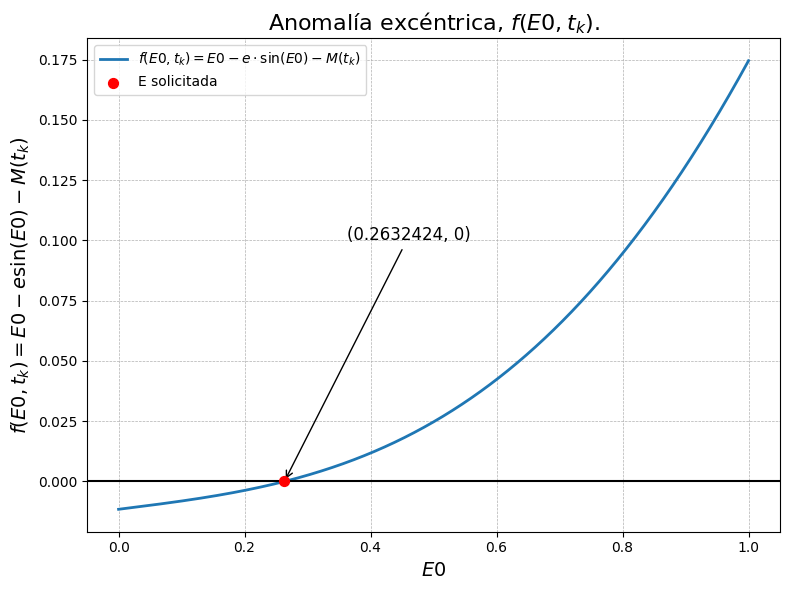

In [ ]:
# f(E) para E en [0, 1]
# Sea t_k = 1987.0996

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(E0, f_E0(E0), label=r'$f(E0, t_{k}) = E0 - e\cdot\sin(E0) - M(t_{k})$',
         linewidth=2)
plt.title(r'Anomalía excéntrica, $f(E0, t_{k})$.', fontsize=16)
plt.xlabel(r'$E0$', fontsize=14)
plt.axhline(0, color='black', linestyle='solid')
plt.ylabel(r'$f(E0, t_{k}) = E0 - e\sin(E0) - M(t_{k})$', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Punto buscado
raiz
f_E_raiz = 0
plt.scatter(raiz, f_E_raiz, color='red', s=50, zorder=5, label=\
            'E solicitada')

# Anotaciones sobre el punto
plt.annotate((np.round(raiz, 7), 0), xy=(raiz, 0), xytext=(raiz + 0.1, 0.1),
             fontsize=12, color='black', arrowprops=dict(facecolor='black',
                                                     arrowstyle='->')
            )

plt.legend()
plt.tight_layout()
plt.show()

## Solución por método de Newton y secante.

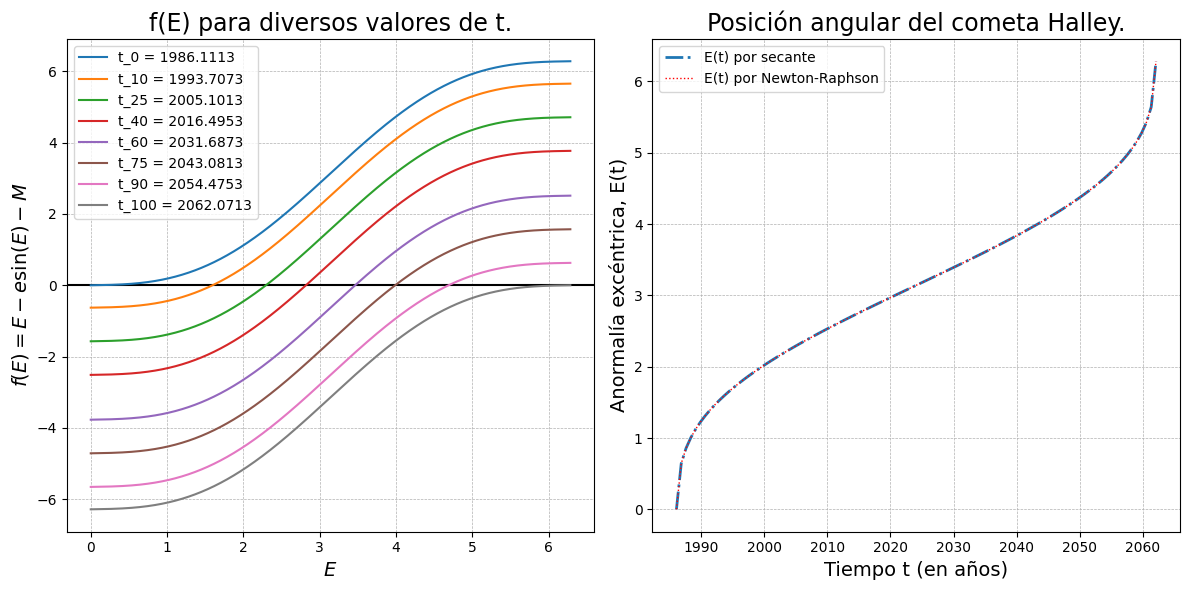

In [ ]:
# Secante
fig, (fe, et) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de f(E) para diversos valores de t.
fe.set_title(r'f(E) para diversos valores de t.', fontsize=17)
fe.set_xlabel(r'$E$', fontsize=14)
fe.axhline(0, color='black', linestyle='solid')
fe.set_ylabel(r'$f(E) = E - e\sin(E) - M$', fontsize=14)
fe.grid(True, which='both', linestyle='--', linewidth=0.5)


soluciones_secante = np.zeros(101)  # Se cubre el período orbital con Δt=T/100 y
                                    # ti=t0+(i)∗Δt
soluciones_newton = np.zeros(101)
for i, tiempo in enumerate(t):  # t es el intervalo previamente definido
  f_i = lambda E: E - e * np.sin(E) - M(tiempo)
  df_i = lambda E, h=1e-12: (f_i(E + h) - f_i(E - h)) / (2 * h)

  raiz_1, iteraciones = secante(f_i, 0, 2 * np.pi)
  raiz_2, iteraciones_2 = newton_raphson(f_i, df_i, np.pi)
  soluciones_secante[i] = raiz_1
  soluciones_newton[i] = raiz_2

  if i in [0, 10, 25, 40, 60, 75, 90, 100]:  # Algunos gráficos de f(E)
    fe.plot(E, f_i(E), label=f't_{i} = {tiempo:.4f}')
    fe.legend(loc="upper left")

# Gráfico de E(t)
et.plot(t, soluciones_secante, label='E(t) por secante', linewidth=2,
        linestyle='-.')
et.plot(t, soluciones_secante, label='E(t) por Newton-Raphson', linewidth=1,
        linestyle=':', color='red')
et.set_title(r'Posición angular del cometa Halley.', fontsize=17)
et.set_xlabel('Tiempo t (en años)', fontsize=14)
et.set_ylabel(r'Anormalía excéntrica, E(t)', fontsize=14)
et.grid(True, which='both', linestyle='--', linewidth=0.5)
et.legend(loc="upper left")

plt.tight_layout()
plt.show()

#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente.


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

# Solución por Newton-Rapson y secante para T = 0.5; validación por punto fijo.

In [ ]:
m = np.arange(-1, 1, 1e-2)  # Intervalo de magnetización
T = np.linspace(0.1, 0.99, 200)  # Intervalo de temperatura

# Funciones
m_T = lambda m, T: np.tanh(m / T) - m

In [ ]:
T0 = 0.5
m_T0 = lambda m: np.tanh(m / T0) - m
dm_T0 = lambda m, h=1e-12: (m_T0(m + h) - m_T0(m - h)) / (2 * h)

raiz_new_0, iter_new_0 = newton_raphson(m_T0, dm_T0, -0.5)
raiz_new_1, iter_new_1 = newton_raphson(m_T0, dm_T0, 0.1)
raiz_new_2, iter_new_1 = newton_raphson(m_T0, dm_T0, 0.5)
raiz_sec_0, iter_sec_0 = secante(m_T0, -1, -0.5)
raiz_sec_1, iter_sec_1 = secante(m_T0, -0.2, 0.2)
raiz_sec_2, iter_sec_2 = secante(m_T0, 0.5, 1)

print(f'm(T) tiene tres raíces para satisfacer la expresión.')
print()
print(f'm({T0}) por método de la secante: {np.round(raiz_sec_0, 4)}')
print(f'm({T0}) por método de la secante: {np.round(raiz_sec_1, 4)}')
print(f'm({T0}) por método de la secante: {np.round(raiz_sec_2, 4)}')
print()
print(f'm({T0}) por el método de Newton: {np.round(raiz_new_0, 4)}')
print(f'm({T0}) por el método de Newton: {np.round(raiz_new_1, 4)}')
print(f'm({T0}) por el método de Newton: {np.round(raiz_new_2, 4)}')

m(T) tiene tres raíces para satisfacer la expresión.

m(0.5) por método de la secante: -0.9575
m(0.5) por método de la secante: 0.0
m(0.5) por método de la secante: 0.9575

m(0.5) por el método de Newton: -0.9575
m(0.5) por el método de Newton: 0.0
m(0.5) por el método de Newton: 0.9575


In [ ]:
# Validación por punto fijo
g = lambda m: np.tanh(m / 0.5)
a = punto_fijo(g, -0.5)
b = punto_fijo(g, 0.1)

print(f'm({T0}) por punto fijo: {np.round(a[0], 4)}')
print(f'm({T0}) por punto fijo: {np.round(b[0], 4)}')

m(0.5) por punto fijo: -0.9575
m(0.5) por punto fijo: 0.9575


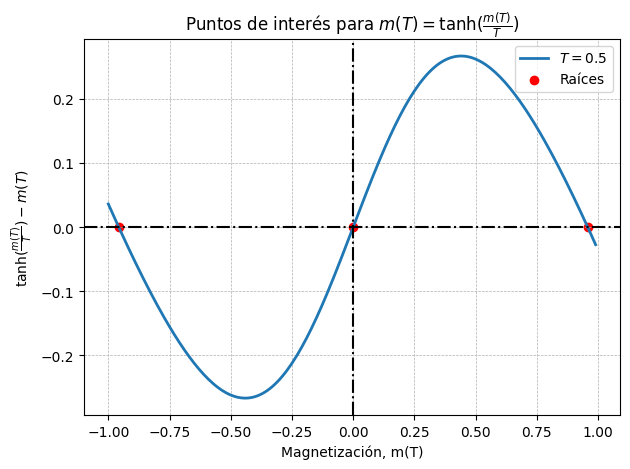

In [ ]:
plt.plot(m, m_T0(m), label=r'$T = 0.5$', linewidth=2)
plt.scatter([raiz_new_0, raiz_new_1, raiz_new_2], [m_T0(raiz_new_0),
            m_T0(raiz_new_1), m_T0(raiz_new_2)], color='r', label='Raíces')
plt.title(r'Puntos de interés para $m(T) = \tanh(\frac{m(T)}{T})$')
plt.xlabel('Magnetización, m(T)')
plt.ylabel(r'$\tanh(\frac{m(T)}{T}) - m(T)$')
plt.axhline(0, color='black', linestyle='-.')
plt.axvline(0, color='black', linestyle='-.')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.legend()
plt.tight_layout()
plt.show()

Por punto fijo la forma de obtener la raíz $m(T) = 0$ trivial para todo valor de T es conociéndola previamente y pasándola como argumento a la función punto_fijo(g, T0), lo cual no siempre se da en los métodos numéricos.
Además, cuando intentamos calcular las raíces para algún valor de T por medio del método de *punto fijo*, el método no siempre arroja respuestas. La causa probable es que la función $m(T) = \tanh[\frac{m(T)}{T}]$ no posea un punto fijo en dicho valor, con lo que el método no es convergente. Una posibilidad para solventar el problema consiste en reescribir $m(T)$ por otro medio, como puede ser considerar funciones hiperbólicas inversas.
$$m(T) = \tanh(\frac{m(T)}{T})$$
$$⟹ \cosh(\frac{m(T)}{T}) \cdot m(T) = \sinh(\frac{m(T)}{T})$$
$$⟹ \textrm{argsinh}[\cosh(\frac{m(T)}{T}) \cdot m(T)] = \frac{m(T)}{T}$$
$$\therefore m(T) = T \cdot \textrm{argsinh}[\cosh(\frac{m(T)}{T}) \cdot m(T)]$$

# Gráfico de magnetización reducida

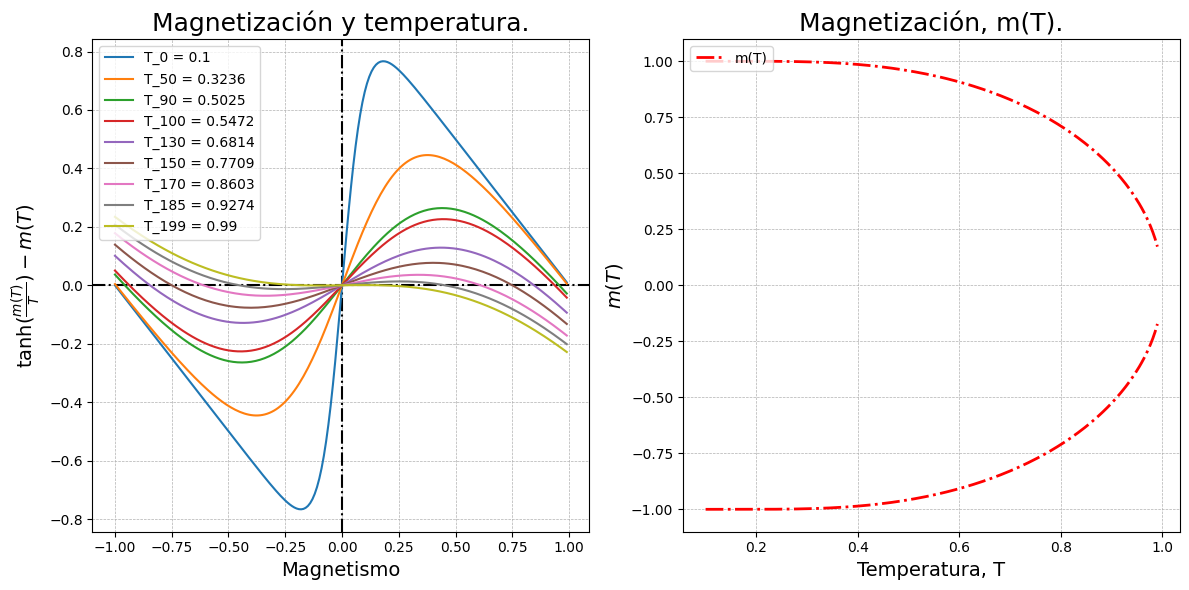

In [ ]:
fig, (mag_temp, magnet) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de m(T) - tanh[m(T) / T] para diversos valores de T.
mag_temp.set_title('Magnetización y temperatura.', fontsize=18)
mag_temp.set_xlabel('Magnetismo', fontsize=14)
mag_temp.axhline(0, color='black', linestyle='-.')
mag_temp.axvline(0, color='black', linestyle='-.')
mag_temp.set_ylabel(r'$\tanh(\frac{m(T)}{T}) - m(T)$', fontsize=14)
mag_temp.grid(True, which='both', linestyle='--', linewidth=0.5)


sol_secante = np.zeros(200)  # Se cubre el rango de temperaturas
sol_secante_1 = np.zeros(200)
for i, temperatura in enumerate(T):
  m_T_i = lambda m: np.tanh(m / temperatura) - m

  raiz_0_i, iteraciones = secante(m_T_i, -1, -0.5)
  raiz_1_i, iteraciones = secante(m_T_i, 0.5, 1)
  sol_secante[i] = raiz_0_i
  sol_secante_1[i] = raiz_1_i

  if i in [0, 50, 90, 100, 130, 150, 170, 185, 199]:  # Algunos gráficos de
                                                      # m(T) - tanh[m(T) / T]
    mag_temp.plot(m, m_T_i(m), label=f'T_{i} = {np.round(temperatura, 4)}')
    mag_temp.legend(loc="upper left")

# Gráfico de E(t)
magnet.plot(T, sol_secante, label='m(T)', linewidth=2, linestyle='-.',
            color='r')
magnet.plot(T, sol_secante_1, linewidth=2, linestyle='-.', color='r')
magnet.set_title('Magnetización, m(T).', fontsize=18)
magnet.set_xlabel('Temperatura, T', fontsize=14)
magnet.set_ylabel(r'$m(T)$', fontsize=14)
magnet.grid(True, which='both', linestyle='--', linewidth=0.5)
magnet.legend(loc="upper left")

plt.tight_layout()
plt.show()

